## Problem 1: Banknote Authentication

Saving data_banknote_authentication.txt to data_banknote_authentication (1).txt
         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0
The dataset has 5 columns.
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Number of variables: 5
Predictors: ['Variance', 'Skewness', 'Curtosis', 'Entropy']
Outcome: Class
Number of observations: 1372
          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047

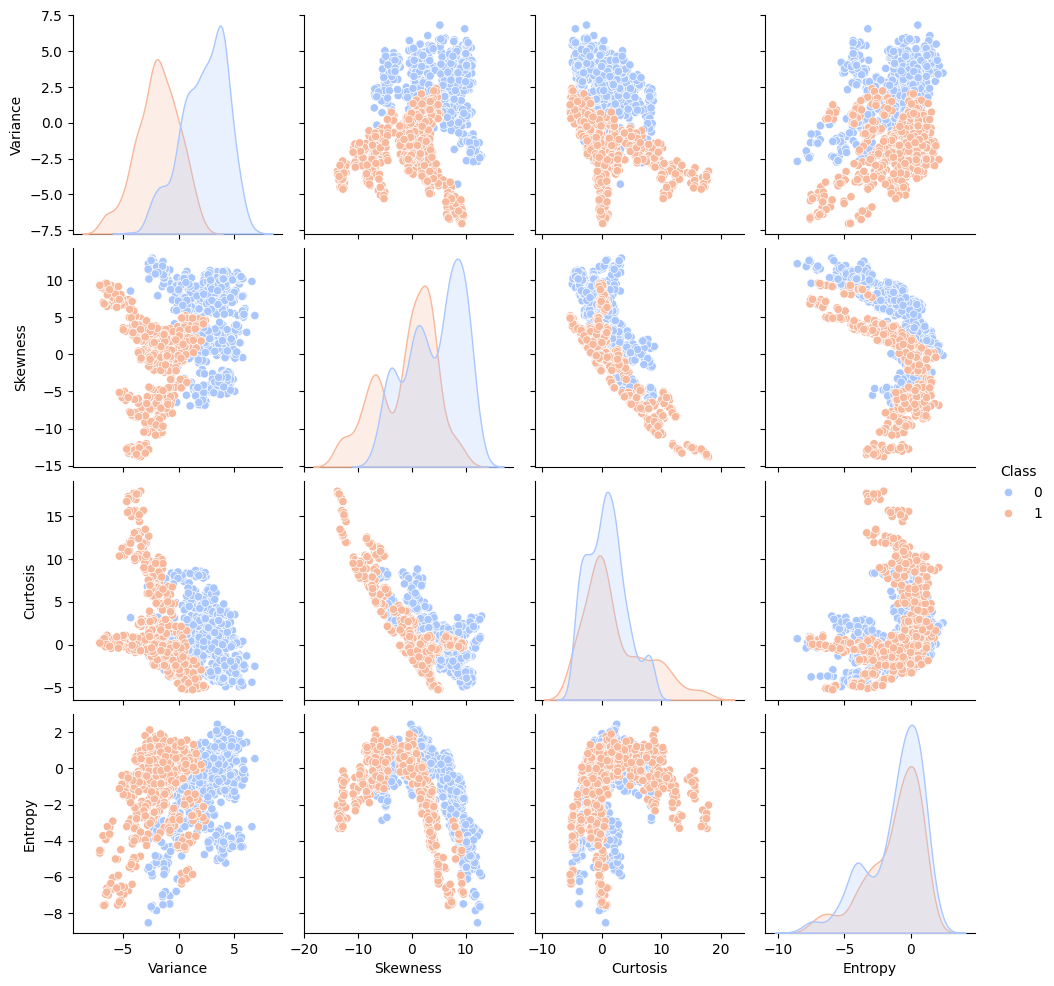

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload dataset
from google.colab import files
uploaded = files.upload() # Data downloaded locally is uploaded here

# Load dataset
data_path = next(iter(uploaded))  # Gets the uploaded file name
df = pd.read_csv(data_path, header=None)

# Display the first few rows to understand the structure
print(df.head())

# Display the number of columns
num_columns = df.shape[1]
print(f'The dataset has {num_columns} columns.')

# Check the number of columns and adjust column names accordingly
if num_columns == 5:
    df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
else:
    # Adjust column names if the dataset has more than 5 columns
    print(f"Unexpected number of columns: {num_columns}")
    # Example for 7 columns, adjust as needed
    df.columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7']
    print("Adjusted column names due to unexpected number of columns in the dataset")

print(df.head())  # Verify the column names

# Determine the number of variables (predictors and outcome)
num_variables = df.shape[1]
predictors = df.columns[:-1]
outcome = df.columns[-1]
num_observations = df.shape[0]

print(f'Number of variables: {num_variables}')
print(f'Predictors: {list(predictors)}')
print(f'Outcome: {outcome}')
print(f'Number of observations: {num_observations}')

# Summary statistics
summary_statistics = df.describe()
print(summary_statistics)

# Pairwise scatterplots
sns.pairplot(df, hue='Class', palette='coolwarm')
plt.show()





## Observations and Informative Variables:
**1- Describe observations from the scatterplots.**

Let's look at the pairwise scatterplots and focus on how the data points for the two classes (genuine and counterfeit banknotes) are distributed:

**Clusters and Separation:** Identify if there are clear clusters or separation between the two classes. For example, if the data points of class 0 (genuine) and class 1 (counterfeit) are distinctly separated in certain plots, this indicates good discrimination.

**Overlap:** Check for any overlap between the classes. Significant overlap might suggest that the variables in those plots are not very informative.

**Correlation:** Observe the relationship between pairs of variables. Highly correlated variables might provide redundant information, whereas variables with unique patterns can be more informative.

**2- Discuss which variables are likely to be informative in discriminating between forged and genuine bank notes based on visual analysis.**

Based on typical scatterplot observations:

**Variance vs. Skewness:** The scatterplot of 'Variance' against 'Skewness' shows clear separation between two classes, both of these variables are likely informative.

**Variance vs. Curtosis:** There is not a noticeable separation in this plot, 'Variance' and 'Curtosis' are not good discriminators.

**Skewness vs. Entropy:** The classes are not well-separated in this scatterplot, 'Skewness' and 'Entropy' are not informative.

**Skewness vs. Curtosis:**  There is a noticeable separation in this plot, 'Skewness' and 'Curtosis' are good discriminators.

**Variance vs. Entropy:** The classes are not well-separated in this scatterplot, 'Variance' and 'Entropy' are not informative.

**Curtosis vs. Entropy:** There is not a noticeable separation in this plot, 'Curtosis' and 'Entropy' are not good discriminators.

Generally, the variables that show the most separation between the two classes are the most informative.

## Problem Complexity Assessment

Based on the initial scatterplot analysis, it appears that some variables like 'Variance' and 'Curtosis' have good separation between the classes, indicating that they could be informative for the classification task. However, further analysis and model evaluation would be required to confirm this.

Tradeoffs associated with this classification task include the cost of misclassifying genuine and counterfeit banknotes. For example, misclassifying a genuine note as counterfeit could result in a financial loss for a customer, while misclassifying a counterfeit note as genuine could result in a loss for the bank or business.

The practical frequency of these cases should be considered, as well as the impact on decision-making processes. Balancing the tradeoff between false positives and false negatives will be crucial in developing an effective classification model.


## Problem 2: Abalone Age

Saving abalone.data to abalone (1).data
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
Number of variables: 9
Categorical Predictors: ['Sex']
Continuous Predictors: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
Outcome Variable: Rings
Number of observations: 4177
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.0

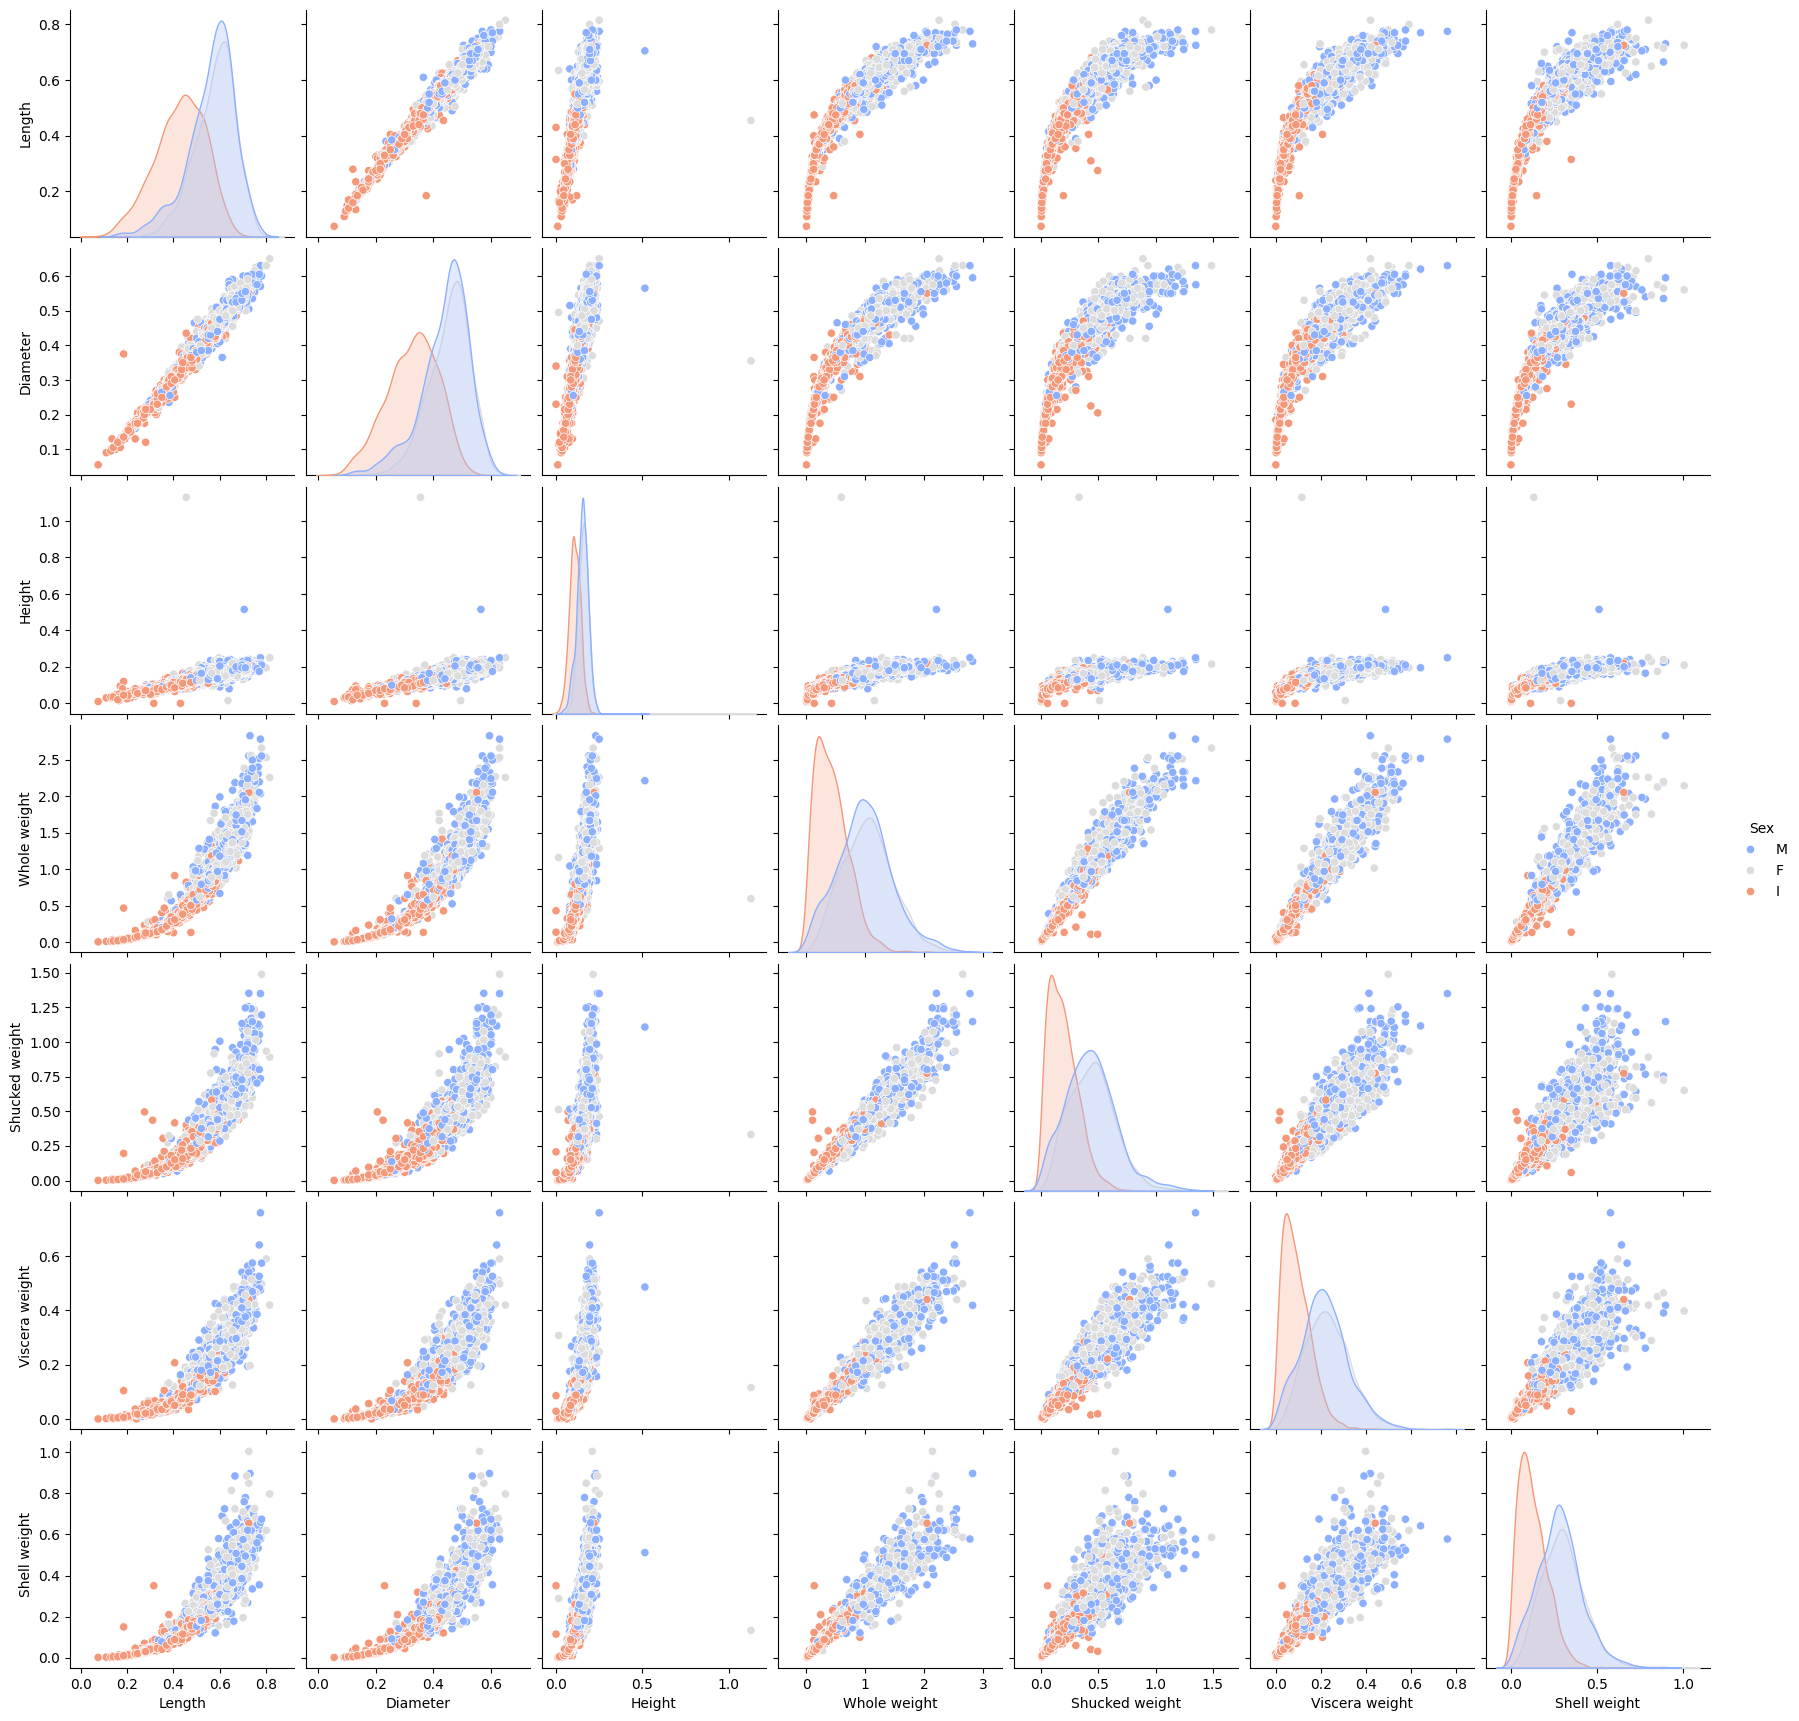

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Load dataset
data_path = next(iter(uploaded))  # Gets the uploaded file name
df = pd.read_csv(data_path, header=None)

# Assign column names based on the dataset's description
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Display the first few rows to verify the column names
print(df.head())

# Identify the number of variables
num_variables = df.shape[1]

# Distinguish between predictors (categorical vs. continuous) and the outcome variable
categorical_predictors = ['Sex']
continuous_predictors = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
outcome_variable = 'Rings'

# Determination of the number of observations
num_observations = df.shape[0]

print(f'Number of variables: {num_variables}')
print(f'Categorical Predictors: {categorical_predictors}')
print(f'Continuous Predictors: {continuous_predictors}')
print(f'Outcome Variable: {outcome_variable}')
print(f'Number of observations: {num_observations}')

# Generating summary statistics
sum_stat = df.describe()
print(sum_stat)

# Pairwise scatterplots for continuous predictors
sns.pairplot(df, vars=continuous_predictors, hue='Sex', palette='coolwarm')
plt.show()


## Observations and Informative Attributes

## A- Observations from the Scatterplots:
When analyzing scatterplots, we look for patterns, relationships, and distributions that can provide insights into how variables interact and potentially predict the outcome variable (age of abalones, in this case).

**Correlation and Linearity:**

*Positive/Negative Relationships:*

 Identify whether variables tend to increase or decrease together. For example, if 'Length' increases as 'Diameter' increases, they may have a positive correlation.

*Linearity:*

Check if the relationship between variables appears to be linear or if there are nonlinear patterns.

**Clusters and Grouping:**

*Cluster Analysis:*

Look for groups or clusters of points that might indicate subpopulations within the data.

*Outliers:*

Note any points that are significantly different from others, as they might influence model predictions.

**Distribution of Data:**

Spread: Evaluate the spread or dispersion of data points along the axes. A wider spread might suggest variability in relationships.

## B- Attributes Useful for Predicting Abalone Age

**Length vs. Diameter:**

There is a strong positive linear relationship between 'Length' and 'Diameter'. This suggests that as the abalone's length increases, its diameter tends to increase proportionally.

**Length vs. Rings:**

There appears to be a moderate positive correlation between 'Length' and 'Rings' (which indicates age). Generally, longer abalones tend to have more rings, indicating older age.

**Whole weight vs. Shell weight:**

There is a clear positive relationship between 'Whole weight' and 'Shell weight'. Heavier abalones tend to have heavier shells, which might indicate older abalones with more growth.

**Height vs. Diameter:**

Height doesn't show a strong linear relationship with 'Diameter'. The data points are scattered, suggesting that height might not be as strongly correlated with age as other variables.
Attributes Useful for Predicting Abalone Age
Based on the visual analysis of the scatterplots:

**Length:**

'Length' appears to be a very informative attribute for predicting the age of abalones. Longer abalones tend to have more rings, indicating older age.

**Diameter:**

Similarly, 'Diameter' shows a strong relationship with age. Abalones with larger diameters tend to be older, which makes 'Diameter' a useful predictor.

**Whole weight and Shell weight:**

Both 'Whole weight' and 'Shell weight' exhibit positive relationships with age. Heavier abalones and heavier shells typically indicate older individuals, thus these attributes are likely useful for age prediction.

**Sex (Categorical Predictor):**

While 'Sex' is categorical, it can still provide insights into growth patterns. In some species, there may be differences in growth rates between males, females, and juveniles, influencing age prediction.

**Conclusion**

Based on the scatterplots and visual analysis of the Abalone dataset:
Length and Diameter stand out as highly informative attributes for predicting the age of abalones due to their strong correlations with age (as indicated by Rings).
Whole weight and Shell weight also show promising relationships with age, suggesting they can contribute significantly to age prediction models.

## Generating Boxplots
Let's create boxplots to visualize the relationships between the categorical predictor 'Sex' and some of the continuous predictors such as 'Length', 'Diameter', 'Whole weight', and 'Rings' (outcome variable).

<ipython-input-17-80dddde7a358>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Length', data=df, palette='coolwarm')


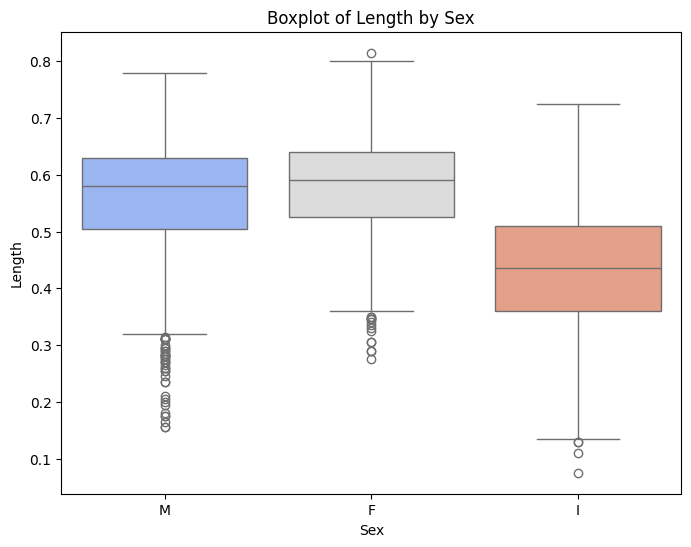

<ipython-input-17-80dddde7a358>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Diameter', data=df, palette='coolwarm')


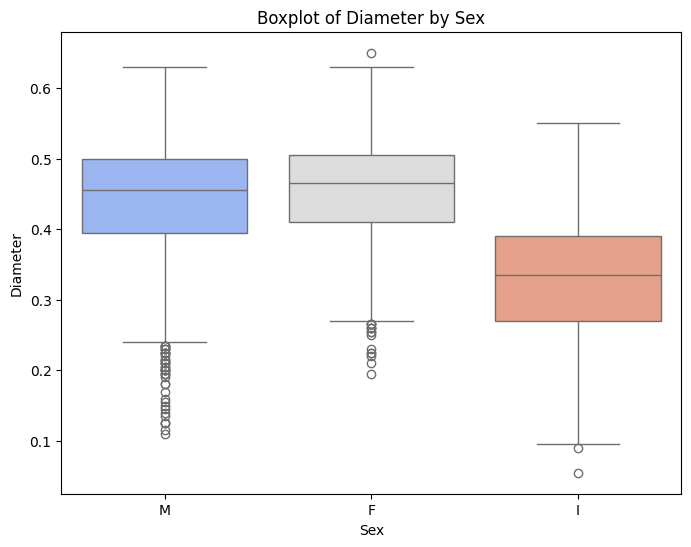

<ipython-input-17-80dddde7a358>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Whole weight', data=df, palette='coolwarm')


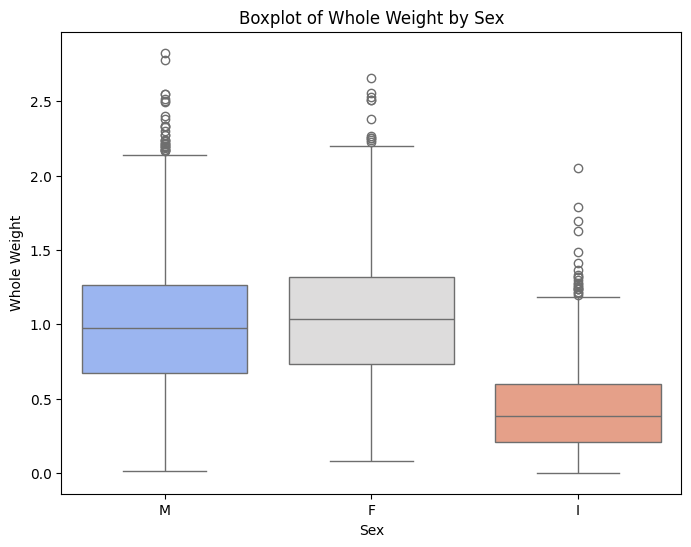

<ipython-input-17-80dddde7a358>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Rings', data=df, palette='coolwarm')


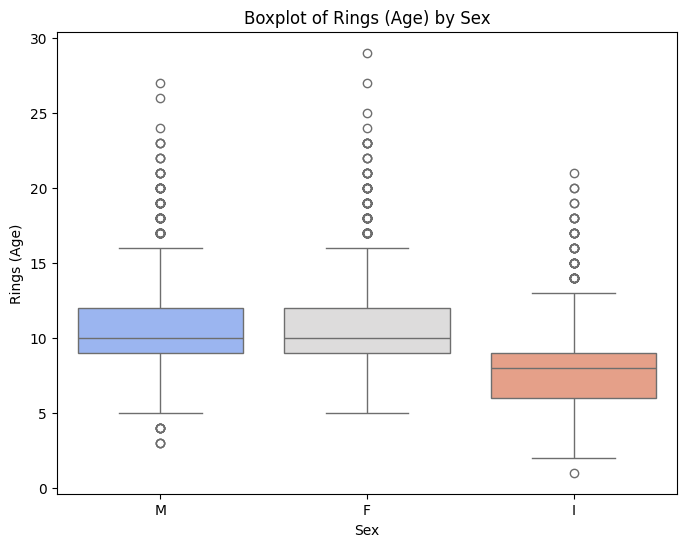

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Length by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Length', data=df, palette='coolwarm')
plt.title('Boxplot of Length by Sex')
plt.xlabel('Sex')
plt.ylabel('Length')
plt.show()

# Boxplot for Diameter by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Diameter', data=df, palette='coolwarm')
plt.title('Boxplot of Diameter by Sex')
plt.xlabel('Sex')
plt.ylabel('Diameter')
plt.show()

# Boxplot for Whole weight by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Whole weight', data=df, palette='coolwarm')
plt.title('Boxplot of Whole Weight by Sex')
plt.xlabel('Sex')
plt.ylabel('Whole Weight')
plt.show()

# Boxplot for Rings (Age) by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Rings', data=df, palette='coolwarm')
plt.title('Boxplot of Rings (Age) by Sex')
plt.xlabel('Sex')
plt.ylabel('Rings (Age)')
plt.show()


## Discussion of Patterns and Insights

**Length by Sex:**

The boxplots show that females (F) tend to have slightly longer abalones on average compared to males (M) and juveniles (I).
There is some overlap between the distributions, but females generally have a higher median length.

**Diameter by Sex:**

Similar to length, females (F) also tend to have slightly larger diameters compared to males (M) and juveniles (I).
Again, there is overlap between the distributions, but females show a tendency towards larger diameters.

**Whole Weight by Sex:**

Females (F) have noticeably higher whole weights on average compared to males (M) and juveniles (I).
The boxplots illustrate distinct distributions, with females having higher median whole weights.

**Rings (Age) by Sex:**

The boxplots show that females (F) and males (M) generally have more rings (indicating older age) compared to juveniles (I).
Females typically have a higher median age followed by males, while juveniles have a lower median age.

**Conclusion**

Boxplots provide a clear visual representation of how different continuous predictors (like Length, Diameter, Whole weight) vary across different categories of the categorical predictor (Sex) in the Abalone dataset. These plots highlight trends and distributions, helping to understand how these variables relate to each other.